In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/out_visit.csv',index_col='Unnamed: 0')
df.head()

,monthly_spend,visit_count
0,224.835708,8.715575
1,193.086785,9.121569
2,232.384427,10.166102
3,276.151493,10.107604
4,188.292331,5.244661


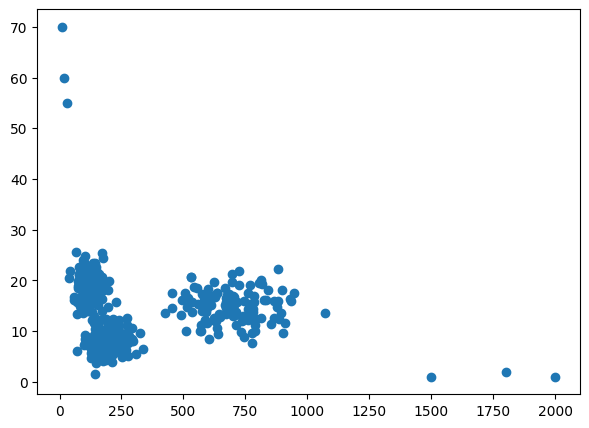

In [3]:
plt.figure(figsize=(7,5))
plt.scatter(df["monthly_spend"],df["visit_count"])
plt.show()

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # DBSCAN 은 Scaler 반드시 필요
scaled_df = scaler.fit_transform(df)

scaled_df


array([[-3.16163001e-01, -7.07120618e-01],
       [-4.33205588e-01, -6.45133124e-01],
       [-2.88334604e-01, -4.85653041e-01],
       [-1.26987063e-01, -4.94584615e-01],
       [-4.50880370e-01, -1.23706207e+00],
       [-4.50877343e-01, -1.10275060e+00],
       [-1.16631123e-01, -6.59103181e-01],
       [-2.66262353e-01, -6.59484674e-01],
       [-4.94255983e-01, -6.59099388e-01],
       [-3.07712444e-01,  3.60100327e-01],
       [-4.93139581e-01, -6.42047147e-01],
       [-4.93565753e-01, -4.69617173e-01],
       [-3.63120216e-01, -5.25059768e-01],
       [-7.60385915e-01, -6.17465330e-01],
       [-7.25665959e-01, -9.12646108e-01],
       [-5.11363793e-01, -5.84615173e-01],
       [-5.94410370e-01, -1.05236603e+00],
       [-3.49796251e-01, -8.88690313e-01],
       [-5.75091781e-01, -9.64586338e-01],
       [-6.68043269e-01, -7.91373858e-01],
       [-1.37563848e-01, -1.09567736e-01],
       [-4.49336263e-01, -1.38656572e+00],
       [-3.95272825e-01, -6.06817703e-01],
       [-6.

In [8]:
dbscan_model = DBSCAN(eps=0.35,min_samples=8)
labels = dbscan_model.fit_predict(scaled_df)
labels

print("이상치 데이터의 갯수",(labels==-1).sum())

이상치 데이터의 갯수 12


In [9]:
set(labels)

{np.int64(-1), np.int64(0), np.int64(1)}

In [11]:
df['cluster'] = labels
df

,monthly_spend,visit_count,cluster
0,224.835708,8.715575,0
1,193.086785,9.121569,0
2,232.384427,10.166102,0
3,276.151493,10.107604,0
4,188.292331,5.244661,0
...,...,...,...
461,1800.000000,2.000000,-1
462,2000.000000,1.000000,-1
463,20.000000,60.000000,-1
464,30.000000,55.000000,-1


In [12]:
print("군집별 고객 숫자",df["cluster"].value_counts())

군집별 고객 숫자 cluster
 0    340
 1    114
-1     12
Name: count, dtype: int64


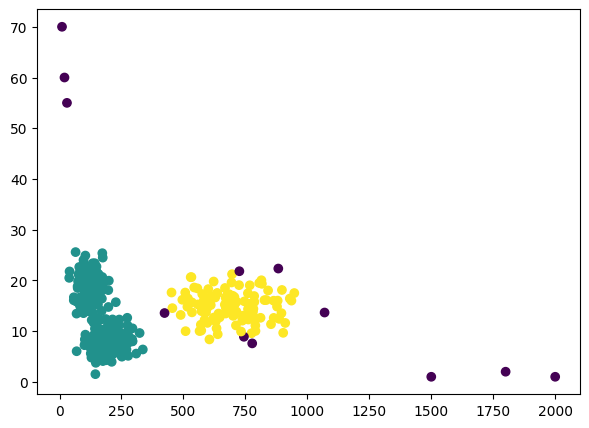

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(df["monthly_spend"],df["visit_count"],c=df["cluster"])
plt.show()

In [15]:
df[df["cluster"]==-1]

,monthly_spend,visit_count,cluster
224,777.445114,7.585066,-1
246,743.991790,8.885626,-1
263,725.677589,21.812079,-1
271,423.769460,13.567028,-1
278,1069.465697,13.667120,-1
294,882.774889,22.337256,-1
460,1500.000000,1.000000,-1
461,1800.000000,2.000000,-1
462,2000.000000,1.000000,-1
463,20.000000,60.000000,-1
